In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

If the center is moved and the radius is fixed to go through one of either (-1,0) or (1,0), there are two possible circles (therefore having two possible airfoils).

In [2]:
def joukowsky(x_cent,y_cent):
    # definition of the circle parameters
    center = np.array([x_cent,y_cent])
    radius1 = np.sqrt((center[0]-1)**2+(center[1]-0)**2)
    radius2 = np.sqrt((center[0]+1)**2+(center[1]-0)**2)

    # calculation of the circle coordinates 
    angle = np.linspace(0,2*np.pi,720)
    chi1 = center[0] + radius1*np.cos(angle)
    eta1 = center[1] + radius1*np.sin(angle)
    chi2 = center[0] + radius2*np.cos(angle)
    eta2 = center[1] + radius2*np.sin(angle)

    # calculations of the Joukowsky transform
    x1 = ((chi1)*(chi1**2+eta1**2+1))/(chi1**2+eta1**2)
    y1 = ((eta1)*(chi1**2+eta1**2-1))/(chi1**2+eta1**2)
    x2 = ((chi2)*(chi2**2+eta2**2+1))/(chi2**2+eta2**2)
    y2 = ((eta2)*(chi2**2+eta2**2-1))/(chi2**2+eta2**2)

    # figure declaration
    plt.figure(figsize=(18,10))
    
    # zeta-plane 
    ax = plt.subplot(1, 2, 1)
    ax.plot(chi1,eta1,'g',label='Circle1')
    ax.plot(chi2,eta2,'b',label='Circle2')
    ax.plot(center[0],center[1],'kx', markersize=10,label='Center')
    ax.plot([-1,1],[0,0],'rh',markersize=10,label='Reference Points')
    ax.grid(True)
    ax.set_xlabel(r"$\chi$",size=24)
    ax.set_ylabel(r"$\eta$",size=24)
    ax.legend(loc='lower center',ncol=2, fontsize = 20)
    ax.set_title(r'$\zeta$-plane $(\mu_x = %.2f, \mu_y = %.2f)$' %(x_cent,y_cent), fontsize=22)
    ax.tick_params(axis = 'both', labelsize = 24)
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    
    # z-plane first possible transformation
    ax = plt.subplot(2, 2, 2)
    ax.plot(x1,y1,'g',label='Transform1')
    ax.set_xlabel(r"$x$",size=24)
    ax.set_ylabel(r"$y$",size=24)
    ax.tick_params(axis = 'both', labelsize = 24)
    ax.set_title(r'$z$-plane', fontsize=22)
    ax.set_ylim([-1,1])
    ax.set_xlim([-2.5,2])

    # z-plane second possible transformation
    ax = plt.subplot(2, 2, 4)
    ax.plot(x2,y2,'b',label='Transform2')
    ax.set_xlabel(r"$x$",size=24)
    ax.set_ylabel(r"$y$",size=24)
    ax.tick_params(axis = 'both', labelsize = 24)
    ax.set_ylim([-2,2])
    ax.set_xlim([-2,3])
    
    # save the figure as .png
    plt.savefig('fixedR.png', bbox_inches='tight')

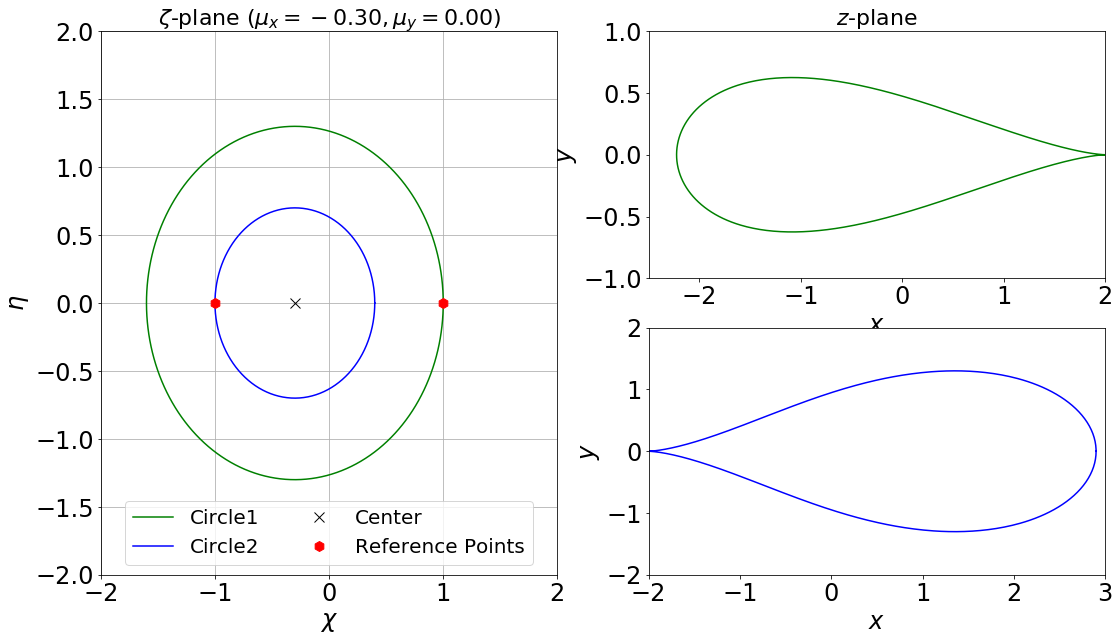

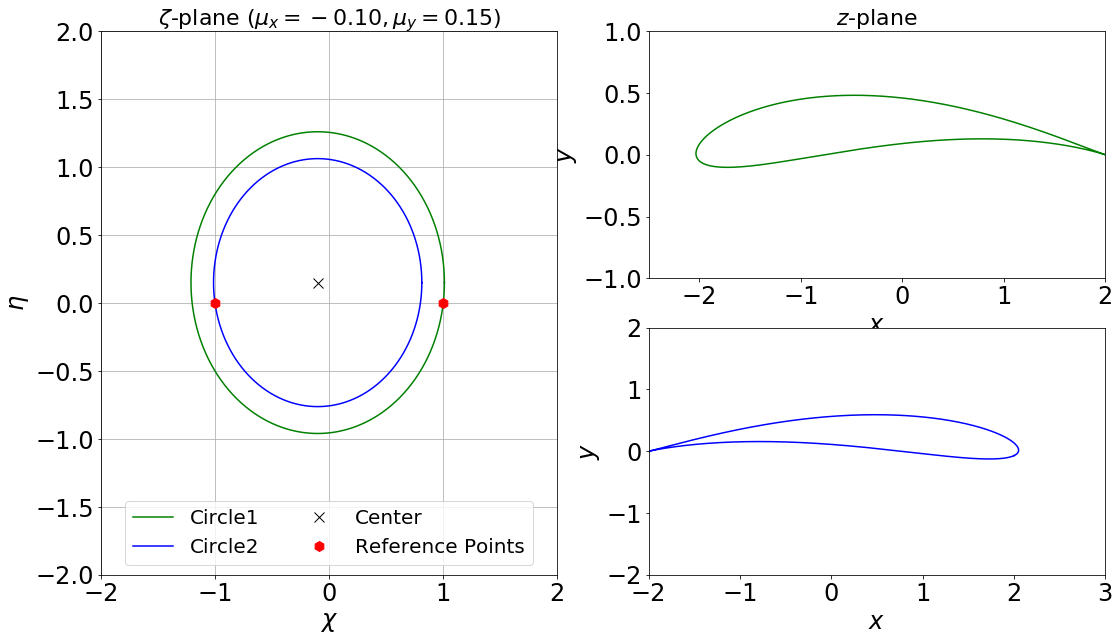

In [3]:
xcent = [-0.3,-0.1]
ycent = [0.0,0.15]
for i in range(len(xcent)):
    joukowsky(xcent[i],ycent[i])